## Heart Disease Prediction
### Author : Farbodkhm

In [156]:
import numpy as np
import pandas as pd
import seaborn as sns
import tensorflow as tf
import matplotlib.pyplot as plt
import plotly.express as px
from sklearn.model_selection import cross_val_score
import warnings
from sklearn.preprocessing import LabelEncoder,StandardScaler,MinMaxScaler,RobustScaler
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.svm import SVR, SVC
from sklearn.tree import DecisionTreeRegressor
from sklearn.linear_model import LogisticRegression
from sklearn.decomposition import KernelPCA
from xgboost import XGBClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA
from lightgbm import LGBMRegressor
from sklearn.naive_bayes import GaussianNB
from sklearn.impute import SimpleImputer
from sklearn.decomposition import PCA
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, RandomForestRegressor, GradientBoostingRegressor, ExtraTreesRegressor, BaggingRegressor, AdaBoostRegressor, IsolationForest, RandomTreesEmbedding, HistGradientBoostingRegressor
from sklearn.metrics import ConfusionMatrixDisplay, accuracy_score, confusion_matrix, r2_score, explained_variance_score, max_error, mean_squared_error, mean_absolute_percentage_error, d2_absolute_error_score, d2_pinball_score, d2_tweedie_score, mean_absolute_error
warnings.filterwarnings("ignore")

## Importing Dataset

In [157]:
data = pd.read_csv('TenYearCHD.csv')
data.head()

,male,age,education,currentSmoker,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
0,1,39,4.0,0,0.0,0.0,0,0,0,195.0,106.0,70.0,26.97,80.0,77.0,0
1,0,46,2.0,0,0.0,0.0,0,0,0,250.0,121.0,81.0,28.73,95.0,76.0,0
2,1,48,1.0,1,20.0,0.0,0,0,0,245.0,127.5,80.0,25.34,75.0,70.0,0
3,0,61,3.0,1,30.0,0.0,0,1,0,225.0,150.0,95.0,28.58,65.0,103.0,1
4,0,46,3.0,1,23.0,0.0,0,0,0,285.0,130.0,84.0,23.10,85.0,85.0,0


## EDA

In [158]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4238 entries, 0 to 4237
Data columns (total 16 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   male             4238 non-null   int64  
 1   age              4238 non-null   int64  
 2   education        4133 non-null   float64
 3   currentSmoker    4238 non-null   int64  
 4   cigsPerDay       4209 non-null   float64
 5   BPMeds           4185 non-null   float64
 6   prevalentStroke  4238 non-null   int64  
 7   prevalentHyp     4238 non-null   int64  
 8   diabetes         4238 non-null   int64  
 9   totChol          4188 non-null   float64
 10  sysBP            4238 non-null   float64
 11  diaBP            4238 non-null   float64
 12  BMI              4219 non-null   float64
 13  heartRate        4237 non-null   float64
 14  glucose          3850 non-null   float64
 15  TenYearCHD       4238 non-null   int64  
dtypes: float64(9), int64(7)
memory usage: 529.9 KB


In [159]:
data.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
male,4238.0,0.429212,0.495022,0.00,0.00,0.0,1.000,1.0
age,4238.0,49.584946,8.572160,32.00,42.00,49.0,56.000,70.0
education,4133.0,1.978950,1.019791,1.00,1.00,2.0,3.000,4.0
currentSmoker,4238.0,0.494101,0.500024,0.00,0.00,0.0,1.000,1.0
cigsPerDay,4209.0,9.003089,11.920094,0.00,0.00,0.0,20.000,70.0
BPMeds,4185.0,0.029630,0.169584,0.00,0.00,0.0,0.000,1.0
prevalentStroke,4238.0,0.005899,0.076587,0.00,0.00,0.0,0.000,1.0
prevalentHyp,4238.0,0.310524,0.462763,0.00,0.00,0.0,1.000,1.0
diabetes,4238.0,0.025720,0.158316,0.00,0.00,0.0,0.000,1.0
totChol,4188.0,236.721585,44.590334,107.00,206.00,234.0,263.000,696.0


In [160]:
data[data.duplicated()].size

0

In [161]:
data.isnull().sum()

male                 0
age                  0
education          105
currentSmoker        0
cigsPerDay          29
BPMeds              53
prevalentStroke      0
prevalentHyp         0
diabetes             0
totChol             50
sysBP                0
diaBP                0
BMI                 19
heartRate            1
glucose            388
TenYearCHD           0
dtype: int64

## Some Visualizations

Text(0.5, 1.0, 'Gender')

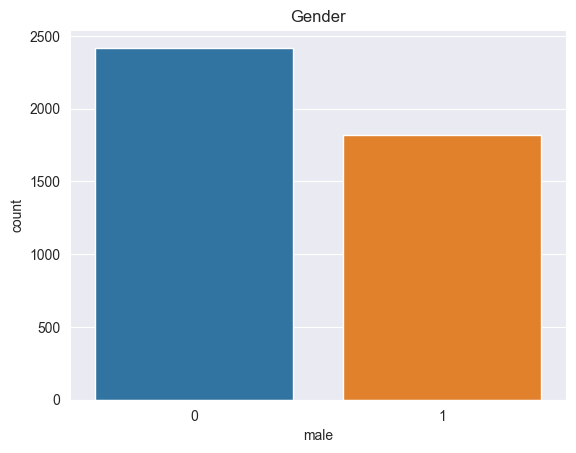

In [162]:
sns.countplot(x='male', data=data)
plt.title('Gender')

<Axes: title={'center': 'Smoker'}, xlabel='currentSmoker', ylabel='count'>

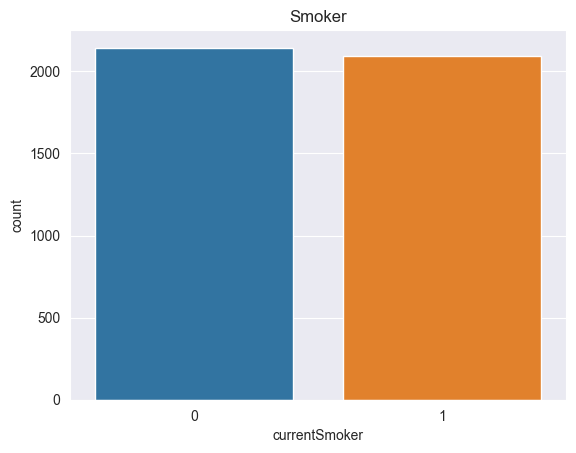

In [163]:
plt.title('Smoker')
sns.countplot(x='currentSmoker',data=data)

<Axes: >

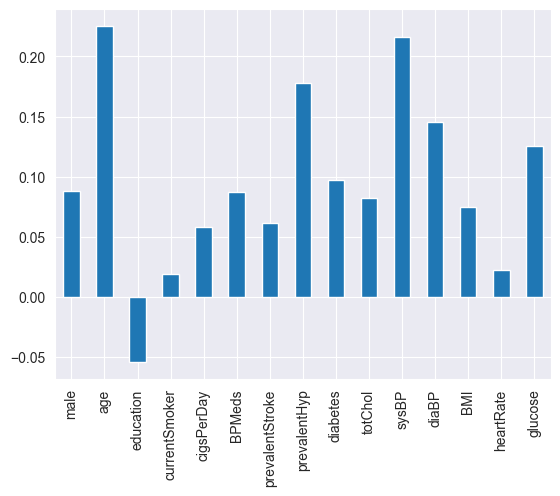

In [164]:
data.corr()['TenYearCHD'][:-1].plot(kind='bar')

## Dealing With Missing Data

In [165]:
data['education'] = data['education'].fillna(value=data['education'].mean())

In [166]:
data['cigsPerDay'] = data['cigsPerDay'].fillna(value=data['cigsPerDay'].mean())

In [167]:
data['BPMeds'] = data['BPMeds'].fillna(value=data['BPMeds'].mean())

In [168]:
data['totChol'] = data['totChol'].fillna(value=data['totChol'].mean())

In [169]:
data['BMI'] = data['BMI'].fillna(value=data['BMI'].mean())

In [170]:
data['heartRate'] = data['heartRate'].fillna(value=data['heartRate'].mean())

In [171]:
data['glucose'] = data['glucose'].fillna(value=data['glucose'].mean())

In [172]:
data.isnull().sum()

male               0
age                0
education          0
currentSmoker      0
cigsPerDay         0
BPMeds             0
prevalentStroke    0
prevalentHyp       0
diabetes           0
totChol            0
sysBP              0
diaBP              0
BMI                0
heartRate          0
glucose            0
TenYearCHD         0
dtype: int64

## Split Train & Test Data

In [173]:
x = data.iloc[:, :-1].values
y = data.iloc[:, -1].values.reshape(-1, 1)

In [174]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=0)

## Feature Scaling

In [175]:
sc_x = StandardScaler()
x_train = sc_x.fit_transform(x_train)
x_test = sc_x.transform(x_test)
x_test

array([[-0.86245415, -0.29592245, -0.97565626, ...,  0.44846618,
        -0.07401297, -0.88034606],
       [-0.86245415,  0.98825632,  0.00952905, ..., -0.59776524,
        -1.31126131, -0.3974858 ],
       [-0.86245415,  1.3384869 ,  0.00952905, ...,  3.09337832,
        -1.55871098, -0.17800387],
       ...,
       [ 1.15948193,  0.05430812,  0.99471437, ...,  0.11846328,
         0.99826892, -0.22190025],
       [ 1.15948193, -0.5294095 ,  1.97989969, ..., -0.38265224,
         0.58585281,  1.0071986 ],
       [-0.86245415,  0.05430812, -0.97565626, ..., -0.66376582,
        -1.06381164, -0.30969303]])

## Training The Models

Accuracy is: 0.8455188679245284
Accuracy: 85.72 %
Standard Deviation: 0.64 %


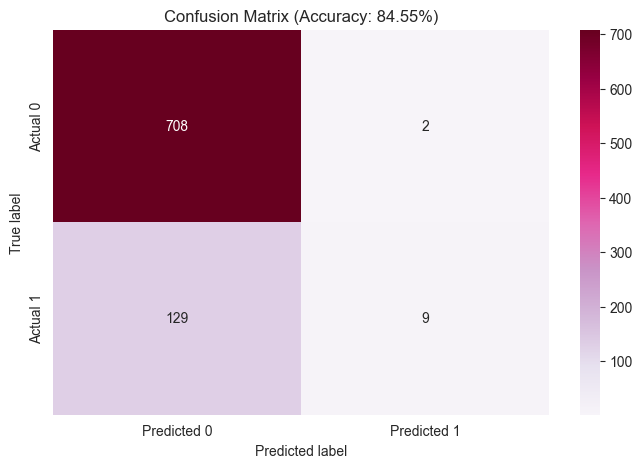

In [176]:
classifier = LogisticRegression(random_state=0)
classifier.fit(x_train,y_train)
y_pred = classifier.predict(x_test)
cm = confusion_matrix(y_test, y_pred)
print('Accuracy is:', accuracy_score(y_test, y_pred))
accuracies = cross_val_score(estimator = classifier, X = x_train, y = y_train, cv = 10)
print("Accuracy: {:.2f} %".format(accuracies.mean()*100))
print("Standard Deviation: {:.2f} %".format(accuracies.std()*100))
plt.figure(figsize=(8, 5))
sns.heatmap(cm, annot=True, fmt='d',
            cmap='PuRd', cbar=True, xticklabels=['Predicted 0', 'Predicted 1'], yticklabels=['Actual 0', 'Actual 1'])
plt.ylabel('True label')
plt.xlabel('Predicted label')
plt.title(f'Confusion Matrix (Accuracy: {accuracy_score(y_test, y_pred) * 100:.2f}%)')
plt.show()

Accuracy is: 0.8384433962264151
Accuracy: 83.24 %
Standard Deviation: 1.11 %


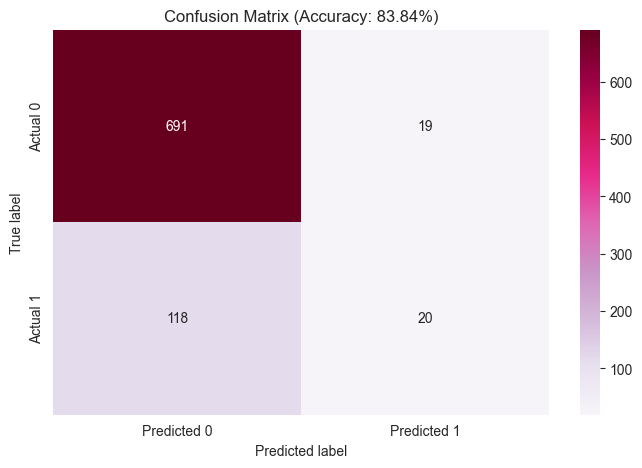

In [177]:
classifier = XGBClassifier()
classifier.fit(x_train,y_train)
y_pred = classifier.predict(x_test)
cm = confusion_matrix(y_test, y_pred)
print('Accuracy is:', accuracy_score(y_test, y_pred))
accuracies = cross_val_score(estimator = classifier, X = x_train, y = y_train, cv = 10)
print("Accuracy: {:.2f} %".format(accuracies.mean()*100))
print("Standard Deviation: {:.2f} %".format(accuracies.std()*100))
plt.figure(figsize=(8, 5))
sns.heatmap(cm, annot=True, fmt='d',
            cmap='PuRd', cbar=True, xticklabels=['Predicted 0', 'Predicted 1'], yticklabels=['Actual 0', 'Actual 1'])
plt.ylabel('True label')
plt.xlabel('Predicted label')
plt.title(f'Confusion Matrix (Accuracy: {accuracy_score(y_test, y_pred) * 100:.2f}%)')
plt.show()

Accuracy is: 0.8195754716981132
Accuracy: 81.68 %
Standard Deviation: 1.23 %


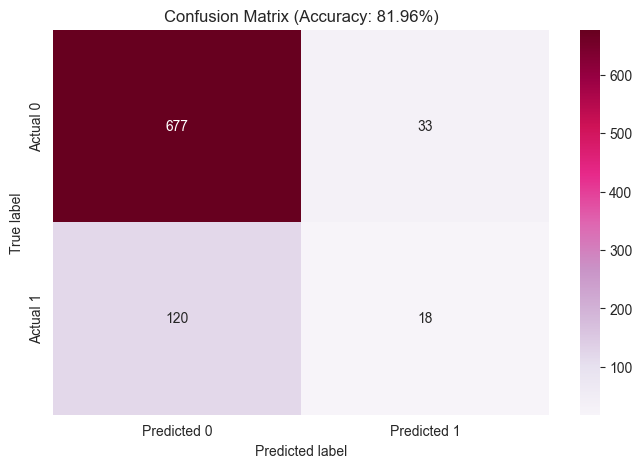

In [178]:
classifier = KNeighborsClassifier(n_neighbors=3, metric = 'minkowski', p = 2)
classifier.fit(x_train, y_train)
y_pred = classifier.predict(x_test)
cm = confusion_matrix(y_test, y_pred)
print('Accuracy is:', accuracy_score(y_test, y_pred))
accuracies = cross_val_score(estimator = classifier, X = x_train, y = y_train, cv = 10)
print("Accuracy: {:.2f} %".format(accuracies.mean()*100))
print("Standard Deviation: {:.2f} %".format(accuracies.std()*100))
plt.figure(figsize=(8, 5))
sns.heatmap(cm, annot=True, fmt='d',
            cmap='PuRd', cbar=True, xticklabels=['Predicted 0', 'Predicted 1'], yticklabels=['Actual 0', 'Actual 1'])
plt.ylabel('True label')
plt.xlabel('Predicted label')
plt.title(f'Confusion Matrix (Accuracy: {accuracy_score(y_test, y_pred) * 100:.2f}%)')
plt.show()

Accuracy is: 0.8007075471698113
Accuracy: 80.59 %
Standard Deviation: 1.48 %


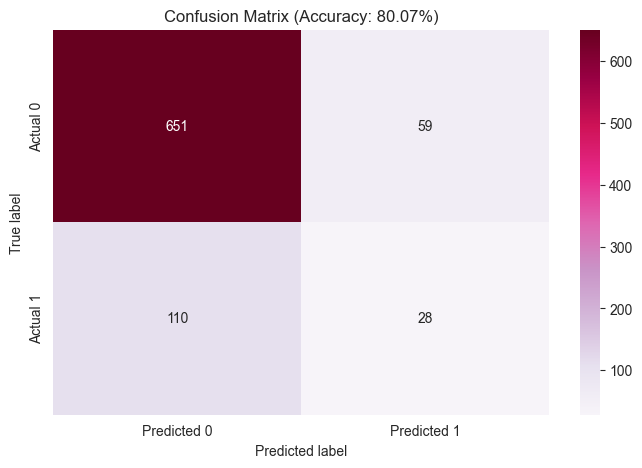

In [179]:
classifier = SVC(kernel = 'sigmoid')
classifier.fit(x_train, y_train)
y_pred = classifier.predict(x_test)
cm = confusion_matrix(y_test, y_pred)
print('Accuracy is:', accuracy_score(y_test, y_pred))
accuracies = cross_val_score(estimator = classifier, X = x_train, y = y_train, cv = 5)
print("Accuracy: {:.2f} %".format(accuracies.mean()*100))
print("Standard Deviation: {:.2f} %".format(accuracies.std()*100))
plt.figure(figsize=(8, 5))
sns.heatmap(cm, annot=True, fmt='d',
            cmap='PuRd', cbar=True, xticklabels=['Predicted 0', 'Predicted 1'], yticklabels=['Actual 0', 'Actual 1'])
plt.ylabel('True label')
plt.xlabel('Predicted label')
plt.title(f'Confusion Matrix (Accuracy: {accuracy_score(y_test, y_pred) * 100:.2f}%)')
plt.show()

Accuracy is: 0.8254716981132075
Accuracy: 80.62 %
Standard Deviation: 1.33 %


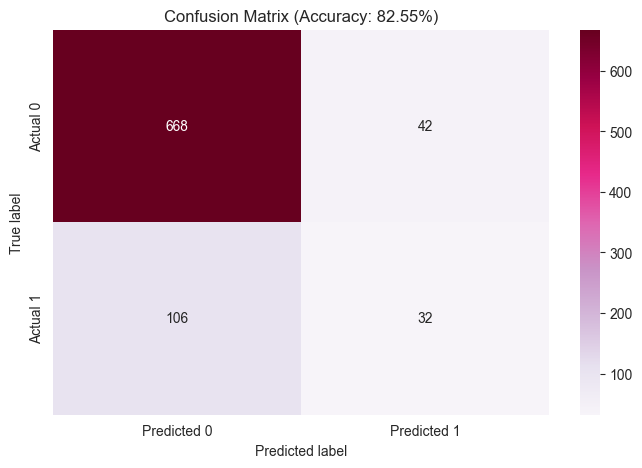

In [180]:
classifier = RandomForestClassifier(n_estimators=3, criterion='entropy',random_state = 0)
classifier.fit(x_train, y_train)
y_pred = classifier.predict(x_test)
cm = confusion_matrix(y_test, y_pred)
print('Accuracy is:', accuracy_score(y_test, y_pred))
accuracies = cross_val_score(estimator = classifier, X = x_train, y = y_train, cv = 10)
print("Accuracy: {:.2f} %".format(accuracies.mean()*100))
print("Standard Deviation: {:.2f} %".format(accuracies.std()*100))
plt.figure(figsize=(8, 5))
sns.heatmap(cm, annot=True, fmt='d',
            cmap='PuRd', cbar=True, xticklabels=['Predicted 0', 'Predicted 1'], yticklabels=['Actual 0', 'Actual 1'])
plt.ylabel('True label')
plt.xlabel('Predicted label')
plt.title(f'Confusion Matrix (Accuracy: {accuracy_score(y_test, y_pred) * 100:.2f}%)')
plt.show()